In [9]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import wfg
import sys
import rootpath
sys.path.append(rootpath.detect())
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist 

from igd_utilities import *
from testsuite.utilities import Pareto_split
from problem_setup import func, l, k, n_obj, n_dim

In [10]:
func = wfg.WFG1
n_obj = 2
l = 3
k = 3
n_dim = k+l

### 2D

In [11]:
M = n_obj
N = 1000 
y = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, M)
    x[n,:] = z
    
pi, di = Pareto_split(y, return_indices=True)

assert pi.shape[0]+di.shape[0] == N
assert y.shape[1] == n_obj

### RME method proof of concept

In [58]:
# rme gaps in data with n_rmees additional points. 
y_rme = y.copy()
x_rme = x.copy()

sorted_y= y_rme[np.argsort(y_rme[:,0])]
diffs = sorted_y[1:] - sorted_y[:-1]
gaps = np.array([np.sqrt(np.dot(diff, diff.T)) for diff in diffs])
gap_max = np.argmax(gaps)

gapx_i = x_rme[np.argsort(y_rme[:,0])][gap_max]
gapx_j = x_rme[np.argsort(y_rme[:,0])][gap_max+1]
gapy_i = y_rme[np.argsort(y_rme[:,0])][gap_max]
gapy_j = y_rme[np.argsort(y_rme[:,0])][gap_max+1]

interp_x = (gapx_i+gapx_j)/2
interp_y = func(interp_x, k, M)

assert interp_x.shape[0] == k+l
assert interp_y.shape[0] == M


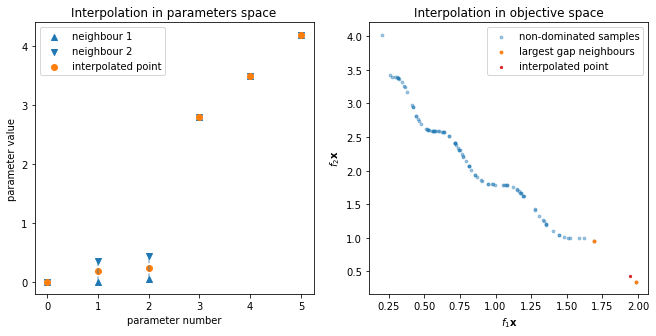

In [59]:
fig = figure(figsize=[11, 5])
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.scatter(range(n_dim), gapx_i, c="C0", marker = "^", label="neighbour 1")
ax1.scatter(range(n_dim), gapx_j, c="C0", marker = "v", label="neighbour 2")
for i in range(n_dim):
    ax1.plot([i]*2, [gapx_i[i], gapx_j[i]], c="C0", linestyle='--', alpha=0.5)
ax1.scatter(range(n_dim), interp_x, c="C1", marker = "o", label="interpolated point")

neighbours_y = np.vstack((gapy_i, gapy_j)) 
ax2.scatter(*y_rme.T, c="C0", alpha=0.4, s=8, label="non-dominated samples")
ax2.scatter(*neighbours_y.T, c="C1", alpha=1., s=8, label="largest gap neighbours")
ax2.scatter(*interp_y.reshape(1,-1).T, c="C3", alpha=1., s=5, label="interpolated point")



ax1.set_title("Interpolation in parameters space")
ax1.set_xlabel("parameter number")
ax1.set_ylabel("parameter value")
ax2.set_title("Interpolation in objective space")
ax2.set_xlabel("$f_1\mathbf{x}$")
ax2.set_ylabel("$f_2\mathbf{x}$")
ax1.legend()
ax2.legend()

In [60]:
# rme gaps in data with n_rmees additional points. 
y_rme = y.copy()
x_rme = x.copy()

sorted_y= y_rme[np.argsort(y_rme[:,0])]
diffs = sorted_y[1:] - sorted_y[:-1]
gaps = np.array([np.sqrt(np.dot(diff, diff.T)) for diff in diffs])
gap_choice = 50

gapx_i = x_rme[np.argsort(y_rme[:,0])][gap_choice]
gapx_j = x_rme[np.argsort(y_rme[:,0])][gap_choice+1]
gapy_i = y_rme[np.argsort(y_rme[:,0])][gap_choice]
gapy_j = y_rme[np.argsort(y_rme[:,0])][gap_choice+1]

interp_x = (gapx_i+gapx_j)/2
interp_y = func(interp_x, k, M)

assert interp_x.shape[0] == k+l
assert interp_y.shape[0] == M


X:
neighbour 1: 	 [8.21275679e-28 9.06671599e-23 1.38456898e-04 2.80000000e+00
 3.50000000e+00 4.20000000e+00]
neighbour 2: 	 [4.06040663e-27 9.22254724e-06 7.21392274e-14 2.80000000e+00
 3.50000000e+00 4.20000000e+00]
interpolated: 	 [2.44084116e-27 4.61127362e-06 6.92284488e-05 2.80000000e+00
 3.50000000e+00 4.20000000e+00]


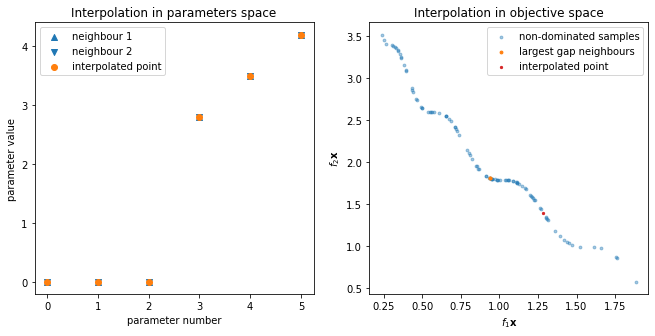

In [54]:
fig = figure(figsize=[11, 5])
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.scatter(range(n_dim), gapx_i, c="C0", marker = "^", label="neighbour 1")
ax1.scatter(range(n_dim), gapx_j, c="C0", marker = "v", label="neighbour 2")
for i in range(n_dim):
    ax1.plot([i]*2, [gapx_i[i], gapx_j[i]], c="C0", linestyle='--', alpha=0.5)
ax1.scatter(range(n_dim), interp_x, c="C1", marker = "o", label="interpolated point")

neighbours_y = np.vstack((gapy_i, gapy_j)) 
ax2.scatter(*y_rme.T, c="C0", alpha=0.4, s=8, label="non-dominated samples")
ax2.scatter(*neighbours_y.T, c="C1", alpha=1., s=8, label="largest gap neighbours")
ax2.scatter(*interp_y.reshape(1,-1).T, c="C3", alpha=1., s=5, label="interpolated point")



ax1.set_title("Interpolation in parameters space")
ax1.set_xlabel("parameter number")
ax1.set_ylabel("parameter value")
ax2.set_title("Interpolation in objective space")
ax2.set_xlabel("$f_1\mathbf{x}$")
ax2.set_ylabel("$f_2\mathbf{x}$")
ax1.legend()
ax2.legend()

print("X:")
print("neighbour 1: \t", gapx_i)
print("neighbour 2: \t", gapx_j)
print("interpolated: \t", interp_x)

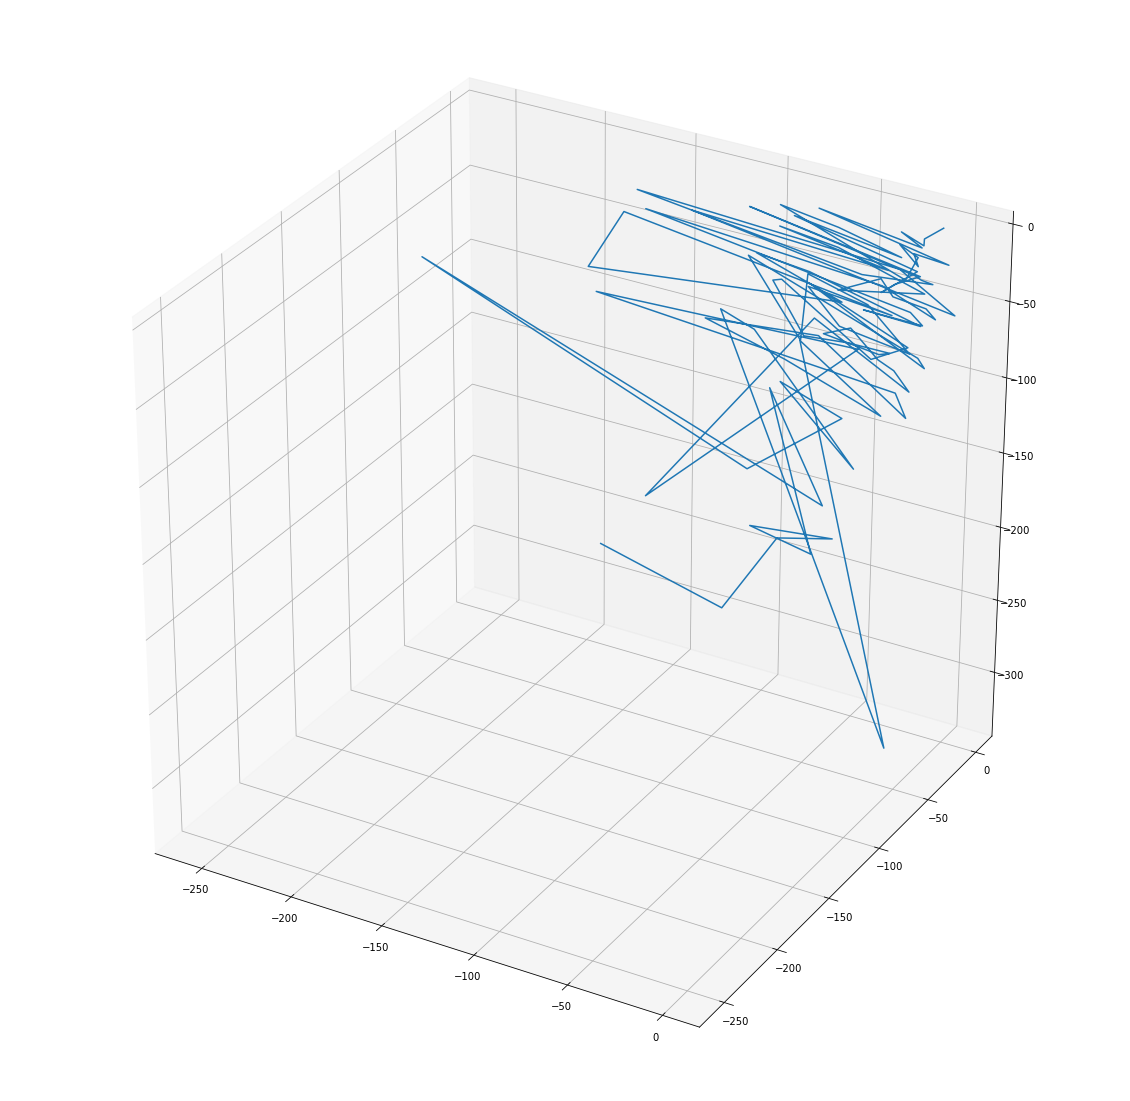

In [69]:
fig = figure(figsize=[20,20])
ax = fig.gca(projection="3d")
ax.plot(*log(x_rme[argsort(y_rme[:,0])].T[:3]))# ,c=argsort(y_rme[:,0]))

In [ ]:
x_rme.T.shape

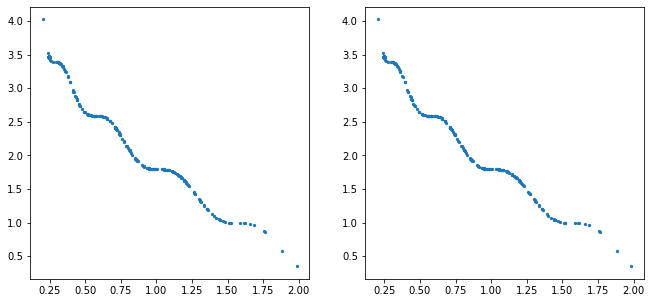

In [19]:
fig = figure(figsize=[11, 5])
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.scatter(*y_rme.T, s=5)
ax2.scatter(*y_rme[di_rme].T, color="lightgrey", s=5)
ax2.scatter(*y_rme[pi_rme].T, color="C0", s=5)

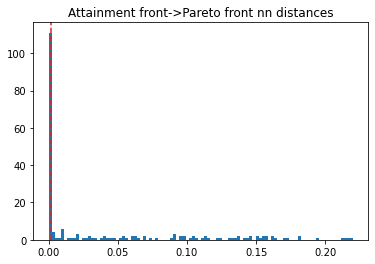

In [17]:
y_attainment = attainment_sample(y_rme[pi_rme], 200)
api_rme = find_neighbours(y_attainment, y_rme[pi_rme], 0.002, True)

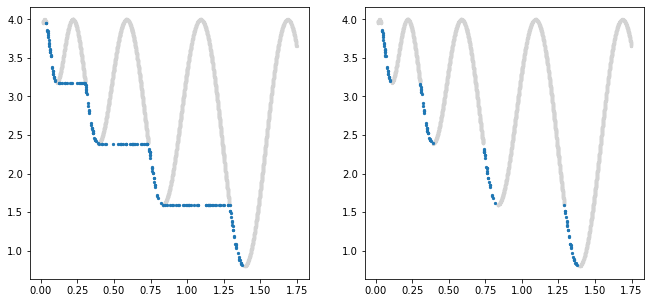

In [18]:
fig = figure(figsize=[11, 5])
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.scatter(*y_rme[di_rme].T, color="lightgrey", s=5)
ax1.scatter(*y_attainment.T, s=5)

ax2.scatter(*y_rme[di_rme].T, color="lightgrey", s=5)
ax2.scatter(*y_attainment[api_rme].T, s=5, c="C0")

### JEF Method

In [31]:
y.shape

(1000, 2)

In [32]:
y_jef = down_sample(y, 200)

In [33]:
y_jef.shape

(200, 2)

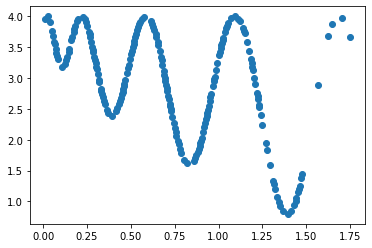

In [34]:
scatter(*y_jef.T)